In [18]:
import nltk
import pickle
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import re
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import numpy as np
from nltk.corpus import cmudict
d = cmudict.dict()
from textstat.textstat import textstatistics, easy_word_set, legacy_round 

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [98]:
data=pickle.load(open('MSD.pickle','rb'))

In [37]:
def text_processing(raw):
    clean=re.sub('[\n]',' ',raw.lower())
    clean=re.sub('[^a-zA-Z]',' ',raw.lower())
    return clean

In [38]:
def tag_lemma(text):
    tokens = word_tokenize(text.lower())
    lmtzr = WordNetLemmatizer()
    p=[]
    for token, tag in pos_tag(tokens):
        lemma = str(lmtzr.lemmatize(token, tag_map[tag[0]]))
        p.append(lemma)        
    return ' '.join(p)

In [39]:
def count_lines(lines):
    c=0
    for i in lines:
        if i!='':
            c=c+1
    return c

In [40]:
def syllables_count(word): 
    return textstatistics().syllable_count(word) 

In [89]:
def unique_lines_more_than_once(lines):
    l=[]
    p=0
    for j in range(len(lines)):
            if lines[j]!='':
                  l.append(lines[j])
    from itertools import groupby
    c=([len(list(group)) for key, group in groupby(l)])
    #count=0
    #for i in range(len(c)):
        #if c[i]>1:
            #count=count+1
    #return count
    return len(c)

In [103]:
with open('msd_read.csv', 'a',errors='replace') as the_file:
    the_file.write('Year,FK Score,SMOG Grade\n')
    for year in data:
        lines=0
        unique=0
        line=0
        for i in range(len(data[year])):
            #total no of unique lines that appear more than once/ total no of lines 
            #unique=unique_lines_more_than_once(data[year][i].splitlines())+unique
            lines=count_lines(data[year][i].splitlines())+lines
            #total no of unique lines that appear more than once/ total no of unique lines 
            #l=unique_lines_more_than_once(data[year][i].splitlines())
            #unique=u+unique
            #line=l+line
        # 1- total number of unique lines/ total number of lines
        #repeat=1-(line/lines)
        w=tag_lemma(text_processing(''.join(data[year]))).split()
        words=len(w)
        syll=0
        poll=0
        for i in range(len(w)):
            syll=syllables_count(w[i])+syll
            if syllables_count(w[i])>2:
                poll=poll+1
        fk=(0.39*(words/lines))+(11.8*(syll/words))-15.59
        smog=1.0430*np.sqrt(poll*30/lines)+3.1291
        #print(str(year)+','+str(fk)+'\n')
        the_file.write(str(year)+','+str(fk)+','+str(smog)+'\n')
    print(year)

1979


In [104]:
df=pd.read_csv('msd_read.csv')

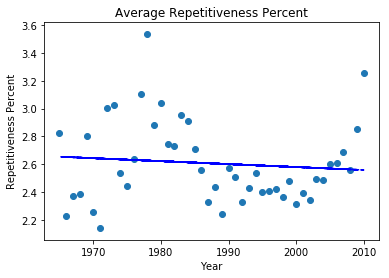

In [101]:
#Average Repetitiveness Score
plt.xlabel('Year')
plt.ylabel('Repetitiveness Percent')
plt.title('Average Repetitiveness Percent')
x=df['Year']
y=df['Repetitiveness']
bb=plt.scatter(x,y,label='Repetitiveness') 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")

In [99]:
with open('msd_repeat.csv', 'a',errors='replace') as the_file:
    the_file.write('Year,Repetitiveness\n')
    for year in data:
        lines=0
        unique=0
        line=0
        for i in range(len(data[year])):
            #total no of unique lines that appear more than once/ total no of lines 
            #unique=unique_lines_more_than_once(data[year][i].splitlines())+unique
            lines=count_lines(data[year][i].splitlines())+lines
            #total no of unique lines that appear more than once/ total no of unique lines 
            l=unique_lines_more_than_once(data[year][i].splitlines())
            #unique=u+unique
            line=l+line
        # 1- total number of unique lines/ total number of lines
        print(year)
        repeat=1-(line/lines)
        the_file.write(str(year)+','+str(repeat*100)+'\n')

1991
1984
2005
1965
1986
2007
1985
2000
1969
1973
1994
1996
1974
1967
1990
1995
1999
1970
1975
2004
2002
2003
1981
1993
1983
1982
1966
1971
1968
2001
1972
1989
1976
1987
1988
1998
2008
1992
1980
1997
1977
2009
2006
2010
1978
1979
